In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import os 

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)
from opdynamics.utils.plotting.plotting import heat_plot

In [10]:
params = parse_experiment_params("../test_params.json")
results = get_experiment_mean_data(params, "../results/test/")

In [15]:
2**4

16

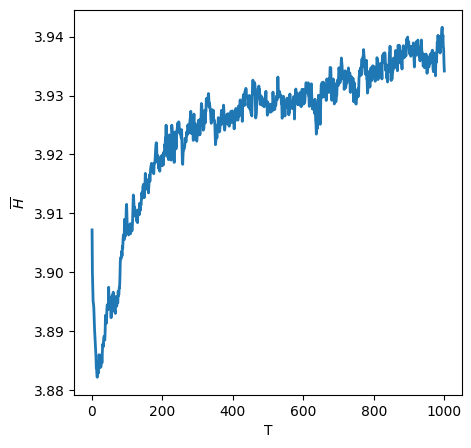

In [12]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (5*1, 5*1))
fig.subplots_adjust(wspace = 0.3)

axs.set_ylabel(r"$\overline{H}$")
axs.set_xlabel("T")

p = params[0]
# plot
line_width = 2
axs.plot(
    np.arange(1, 1001),
    results[make_tuple(p, True)]["entropy"],
    linewidth = line_width,
)

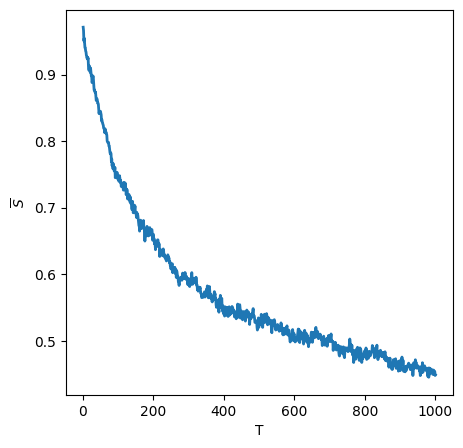

In [14]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (5*1, 5*1))
fig.subplots_adjust(wspace = 0.3)

axs.set_ylabel(r"$\overline{S}$")
axs.set_xlabel("T")

p = params[0]
# plot
line_width = 2
axs.plot(
    np.arange(1, 1001),
    results[make_tuple(p, True)]["proximity"],
    linewidth = line_width,
)

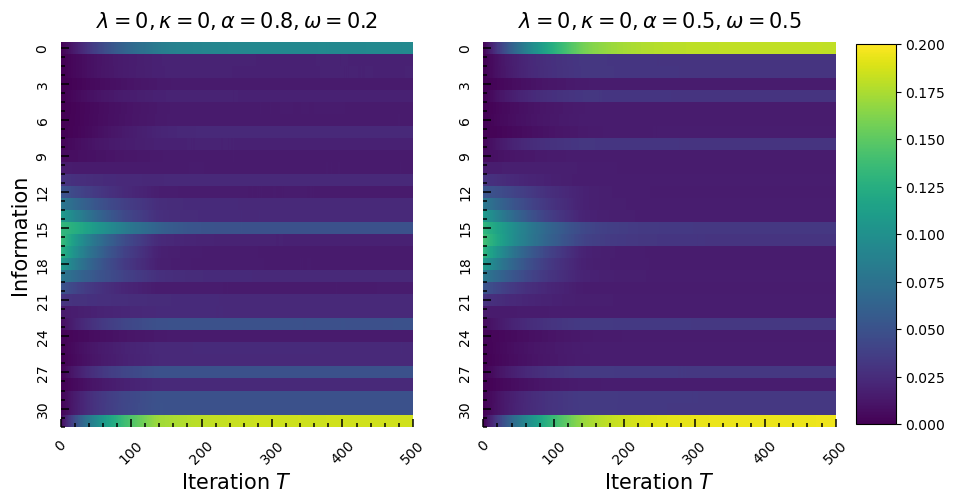

In [31]:
from matplotlib.ticker import MaxNLocator

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 0, \kappa = 0, \alpha = 0.8, \omega = 0.2$",
    r"$\lambda = 0, \kappa = 0, \alpha = 0.5, \omega = 0.5$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = ""
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = ""
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))
fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# ************
mins = []
maxs = []



param = selected_params = [x for x in params if x['kappa'] == 0 and x['lambd'] == 0 and x['alpha'] == 0.8 and x["omega"] == 0.2].pop()
data = results[make_tuple(param, True)]
maxs.append(data['distribution'][:500].max())
mins.append(data['distribution'][:500].min())
_, ax = heat_plot(data['distribution'][:500], cmap = 'viridis', fig = fig, ax = axs[0], vmax = 0.2)

axs[0].set_ylabel("Information")
axs[0].set_xlabel(r"Iteration $T$")

axs[0].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[0].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[0].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[0].set_xticks(new_tick_locations)
axs[0].set_xticklabels(ticks, rotation = 45)




param = selected_params = [x for x in params if x['kappa'] == 0 and x['lambd'] == 0 and x['alpha'] == 0.5 and x["omega"] == 0.5].pop()
data = results[make_tuple(param, True)]
maxs.append(data['distribution'][:500].max())
mins.append(data['distribution'][:500].min())
_, ax = heat_plot(data['distribution'][:500], cmap = 'viridis', fig = fig, ax = axs[1], vmax = 0.2)

# axs[1].set_ylabel("Information (Decimal)")
axs[1].set_xlabel(r"Iteration $T$")

axs[1].tick_params(
    which = 'both',
    top = False,
    right = False,
    labelsize = 10
)

axs[1].xaxis.set_major_locator(MaxNLocator(5))
new_tick_locations = axs[1].get_xticks()
ticks = [int(x) for x in new_tick_locations]
axs[1].set_xticks(new_tick_locations)
axs[1].set_xticklabels(ticks, rotation = 45)


from matplotlib.colors import Normalize
import matplotlib.cm as cm
cbar_ax = fig.add_axes([0.92, 0.115, 0.04, 0.76])
cbar = fig.colorbar(
    cm.ScalarMappable(norm = Normalize(
        np.round(np.min(mins), 1),
        np.round(np.max(maxs), 1))
    ),
    cax = cbar_ax
)